In [183]:
#pip install yfinance pandas matplotlib ta-lib reportlab

In [184]:
#pip install yfinance

In [185]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import os

In [186]:
stock_data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

[*********************100%***********************]  1 of 1 completed


In [187]:
print("Downloaded data:")
print(stock_data.head(10))

Downloaded data:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904617   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412231   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   
2023-01-10  130.259995  131.259995  128.119995  130.729996  129.511887   
2023-01-11  131.250000  133.509995  130.460007  133.490005  132.246170   
2023-01-12  133.880005  134.259995  131.440002  133.410004  132.166916   
2023-01-13  132.029999  134.919998  131.660004  134.759995  133.504349   
2023-01-17  134.830002  137.289993  134.130005  135.940002  134.673355   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600 

In [188]:
# 計算20 天的移動均線(SMA)
stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()

In [189]:
# 相對強弱指數RSI
delta = stock_data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14, min_periods=1).mean()
avg_loss = loss.rolling(window=14, min_periods=1).mean()
rs = avg_gain / avg_loss
stock_data['RSI'] = 100 - (100 / (1 + rs))

In [190]:
# 指數平滑異同移動平均線MACD
exp1 = stock_data['Close'].ewm(span=12, adjust=False).mean()
exp2 = stock_data['Close'].ewm(span=26, adjust=False).mean()
stock_data['MACD'] = exp1 - exp2
stock_data['Signal Line'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()

In [191]:
print("\nTechnical indicators (last 5 rows):")
print(stock_data[['Close', 'SMA_20', 'RSI', 'MACD', 'Signal Line']].tail())


Technical indicators (last 5 rows):
                 Close      SMA_20        RSI      MACD  Signal Line
Date                                                                
2023-12-22  193.600006  193.668501  59.246142  2.636317     3.236690
2023-12-26  193.050003  193.831501  49.031934  2.306308     3.050613
2023-12-27  193.149994  193.969001  52.291513  2.029448     2.846380
2023-12-28  193.580002  194.179501  47.920430  1.823710     2.641846
2023-12-29  192.529999  194.308501  40.185177  1.557975     2.425072


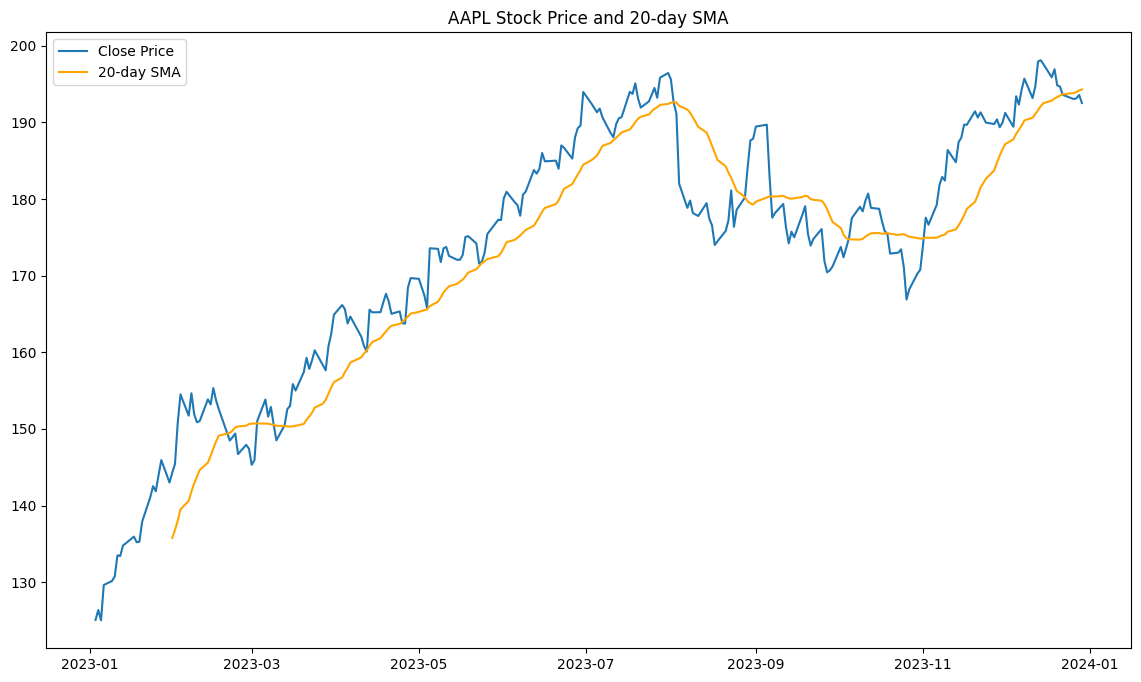

In [192]:
#  1:股票收盤價格 20 日均線 保存
plt.figure(figsize=(14, 8))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
plt.plot(stock_data.index, stock_data['SMA_20'], label='20-day SMA', color='orange')
plt.title('AAPL Stock Price and 20-day SMA')
plt.legend()
image_filename_1 = os.path.abspath('stock_price_sma.png')
plt.savefig(image_filename_1)
#plt.close()

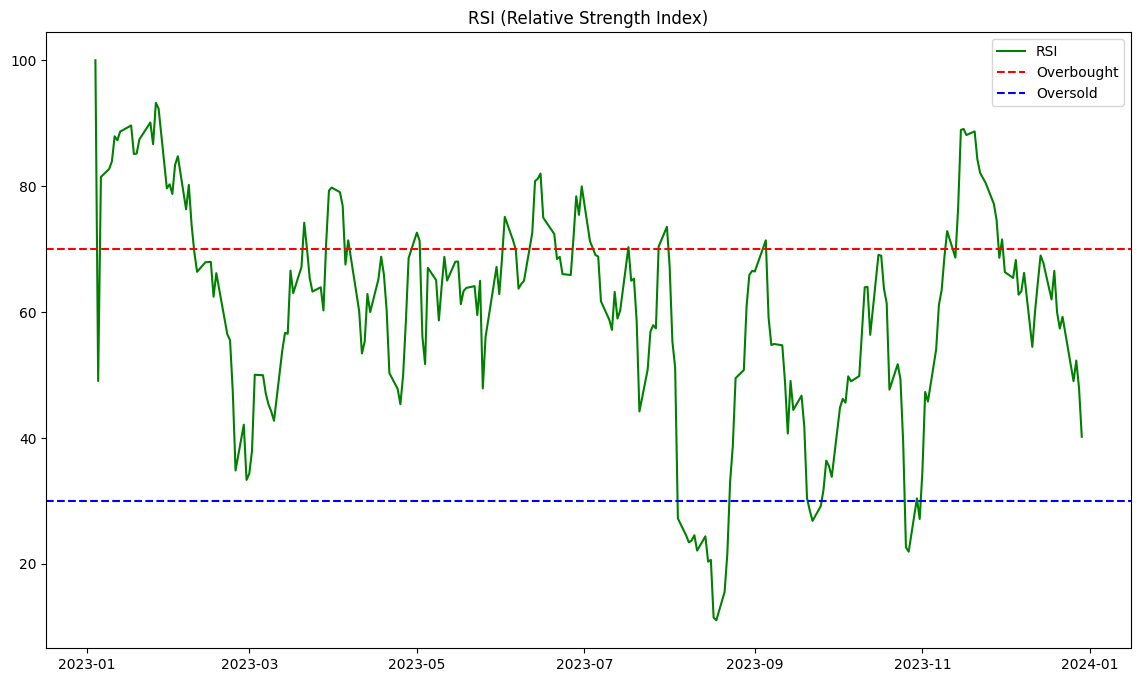

In [193]:
#  2: RSI 指標 保存
plt.figure(figsize=(14, 8))
plt.plot(stock_data.index, stock_data['RSI'], label='RSI', color='green')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='blue', linestyle='--', label='Oversold')
plt.title('RSI (Relative Strength Index)')
plt.legend()
image_filename_2 = os.path.abspath('rsi.png')
plt.savefig(image_filename_2)
#plt.close()

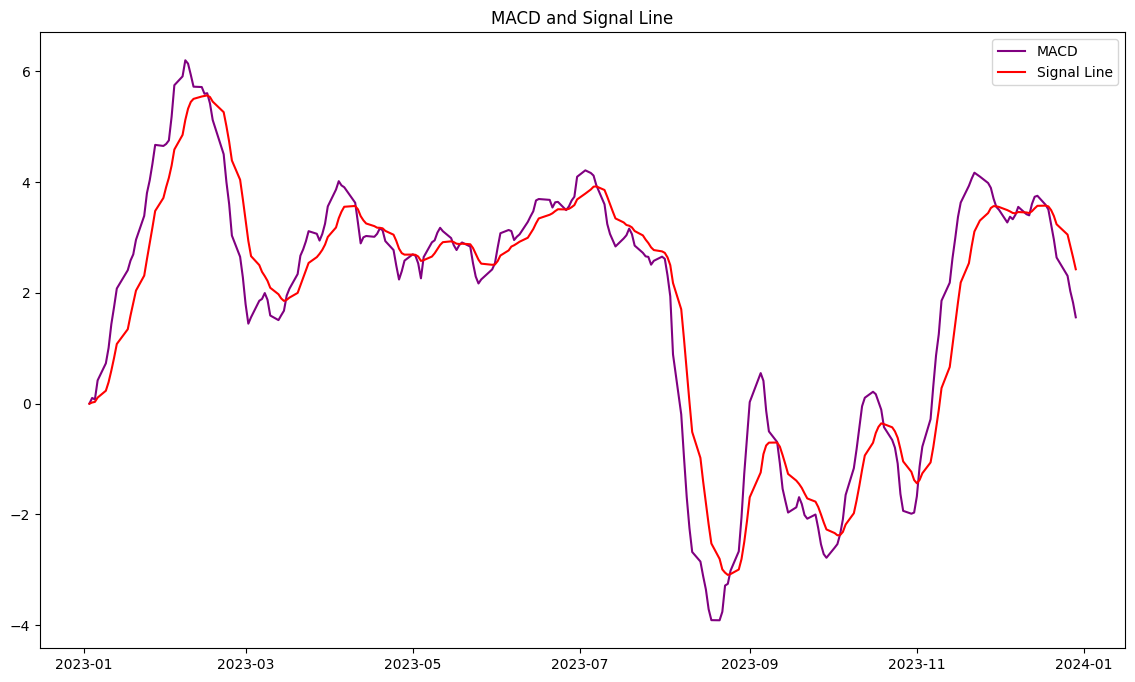

In [194]:
# 3: MACD 指標圖並保存
plt.figure(figsize=(14, 8))
plt.plot(stock_data.index, stock_data['MACD'], label='MACD', color='purple')
plt.plot(stock_data.index, stock_data['Signal Line'], label='Signal Line', color='red')
plt.title('MACD and Signal Line')
plt.legend()
image_filename_3 = os.path.abspath('macd.png')
plt.savefig(image_filename_3)
#plt.close()

In [195]:
#PDF
pdf_file = "AAPL_weekly_report.pdf"
c = canvas.Canvas(pdf_file, pagesize=letter)

In [196]:
#標題
c.setFont("Helvetica", 24)
c.drawString(100, 750, "AAPL Weekly Financial Report")

c.setFont("Helvetica", 12)
c.drawString(100, 700, "This report includes the following analysis for AAPL:")
c.drawString(100, 680, "1. AAPL stock price and 20-day simple moving average (SMA).")
c.drawString(100, 660, "2. Relative Strength Index (RSI) with overbought and oversold thresholds.")
c.drawString(100, 640, "3. MACD and signal line for trend analysis.")

# 插入表格
c.drawString(100, 600, "Technical indicators (last 5 rows):")
last_rows = stock_data[['Close', 'SMA_20', 'RSI', 'MACD', 'Signal Line']].tail().to_string()
text_lines = last_rows.split('\n')
text_y = 580
for line in text_lines:
    c.drawString(100, text_y, line)
    text_y -= 15  # 每行之間保持距離

# 插入圖 1：股票收盤價與20日均線
c.drawImage(image_filename_1, 50, 200, width=500, height=250)  

# 插入圖 2：RSI 指標
c.showPage()  # NEWPAGE
c.drawImage(image_filename_2, 50, 400, width=500, height=250)  

# 插入圖 3：MACD 指標
c.drawImage(image_filename_3, 50, 100, width=500, height=250)

# 保存
c.showPage()
c.save()

print(f"PDF report {pdf_file} has been created successfully.")

PDF report AAPL_weekly_report.pdf has been created successfully.
